In [2]:
# Amazon food review clustering using kmeans and kmeans++
# Rajashree Pethkar
# Upasana Chaudhari

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Add the file path to the csv file
file_path = '/content/drive/Shareddrives/Data_Clustering/Reviews.csv'

data = pd.read_csv(file_path)

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(data.shape)

(568454, 10)


In [4]:
df =  data.sample(n = 5000)

In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
136507,136508,B006Q820X0,#oc-RKF6AFGSSGCT7,piccoli,2,3,5,1340755200,Brooklyn Bean Roastery... benissimo,My friend recieved a box of free sample brookl...
238270,238271,B0020ALBS8,A1I85Y08VRZ32Q,Jimmy Morelli,0,0,5,1254700800,Good Healthy snack,My dogs love these. There a healthy alternati...
360483,360484,B000LT0STS,A2E66ZM5JGSWB2,Patricia Oefelein,0,0,5,1349395200,Gum,I love this gum. Very tasty and no gluten or n...
469023,469024,B000084F5E,A329YKCT5AXRZ2,Terrianne Stjern,1,1,3,1296950400,They Won't Eat It - Boo,I have picky-eater cats. My kids ate whatever ...
319728,319729,B000FNEX8C,A330BAWQRJG0RE,"K. Saito ""Gluten Free Mom of Three""",0,0,5,1224720000,Nana's Ginger Cookies Rock!! Go Nana!!,These cookies are soooo delicious! Due to Cel...
...,...,...,...,...,...,...,...,...,...,...
286062,286063,B008GRIB0A,A2F7XE4EB2CRY2,"F. Dellavecchia ""K-Cup Guy""",0,0,5,1297468800,Real nice coffee!,Just a sweet and enjoyable coffee. Almost a de...
382969,382970,B001PMDYV4,A3KE6TMMH3BG00,"Walker ""pseudo-savant""",3,6,1,1263772800,None of my cats will touch this stuff,"I have three cats, and even the chow-hound (th..."
221429,221430,B000BSW6K8,A2BCF2NFBHHIIQ,"G. Perez ""BakerGirl81""",1,1,5,1270512000,Cat loves it!,"My very picky cat loves Greenies, they are the..."
51647,51648,B0002PHEU2,A22I8UXEP5IWFZ,"Tamara S. Flanagan ""Still Trying""",2,2,5,1261526400,Perfect ingredient for hard tack candy!,I bought cinnamon oil to make Christmas candy....


In [6]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Used this code from previous project
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #replace occurrences of these by space
STOPWORDS = set(stopwords.words('english'))
DIGITS = r'[0-9]'
BAD_SYMBOLS_RE = r'[#+_"]' #remove occurrences of these
PUNCTUATION = r'[^\w\s]'

def clean_text(text):
  text = text.lower() # lowercase text
  text = re.sub(PUNCTUATION, '', text)
  text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
  text = re.sub(BAD_SYMBOLS_RE, '', text )
  text = re.sub(DIGITS, '', text)
  text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
  return text

In [8]:
df.shape

(5000, 10)

In [9]:
# clean text
df['Text'] = df['Text'].apply(clean_text)

In [10]:
# We were initially going to use sentiment analysis but that did not make any sense as in the output.
# Code below was done for the same but we did not use it
import numpy as np

conditions = [
    df['Score'] > 3,
    df['Score'] == 3,
    df['Score'] < 3
]
values = ['positive', 'neutral', 'negative']

df['Sentiment'] = np.select(conditions, values, default=1)

In [11]:
df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time'], axis = 1)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# We used unigram-bigram combination for tfidf
vectorizer = TfidfVectorizer(ngram_range = (1,2))
text_data = df['Text'].tolist()
tfidf_matrix = vectorizer.fit_transform(text_data)

In [14]:
print(tfidf_matrix.shape)

(5000, 163035)


In [15]:
# Tfidf is multidimensional hence we reduced dimensions to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(tfidf_matrix.toarray())
data2D = pca.transform(tfidf_matrix.toarray())

In [16]:
print(data2D.shape)

(5000, 2)


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


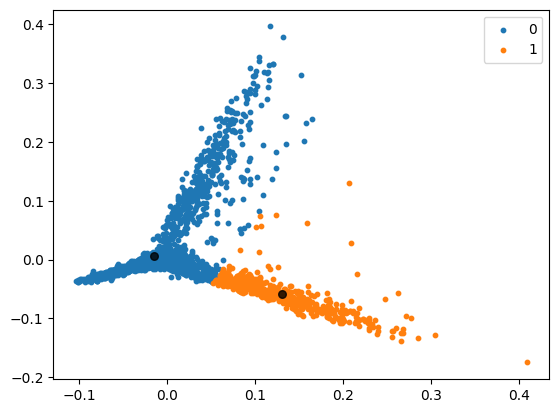

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        0
360483  love gum tasty gluten nasty sugar alcohols rea...        0
469023  pickyeater cats kids ate whatever offered two ...        0
319728  cookies soooo delicious due celiac disease glu...        0
30185   one best gf bread mixes available use bake sor...        0
221831  highly recommend get naked brand products dent...        0
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


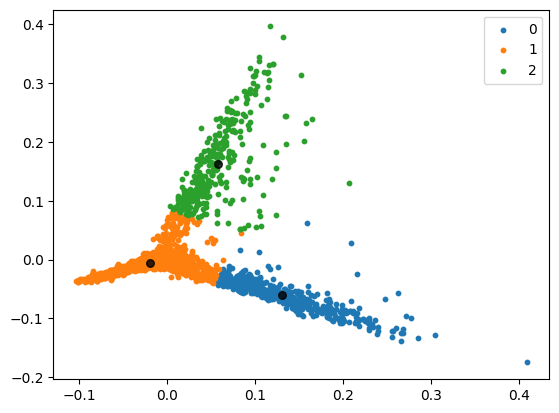

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        0
238270  dogs love healthy alternative treats one thing...        1
360483  love gum tasty gluten nasty sugar alcohols rea...        1
469023  pickyeater cats kids ate whatever offered two ...        1
319728  cookies soooo delicious due celiac disease glu...        1
30185   one best gf bread mixes available use bake sor...        1
221831  highly recommend get naked brand products dent...        1
421038  tastes like rancid dishrag pickled brine sign ...        1
102562  currently compete triathlons battling cramps b...        1
349848  item received match picture item name received...        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


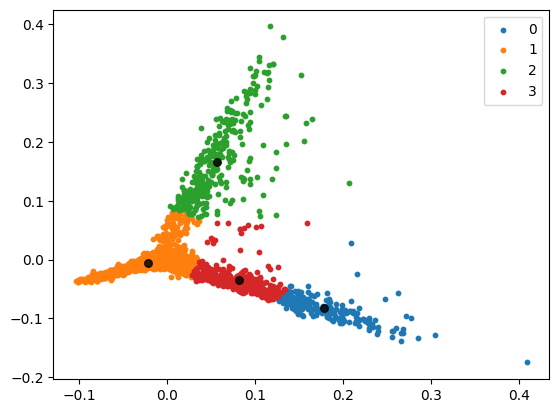

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        3
238270  dogs love healthy alternative treats one thing...        1
360483  love gum tasty gluten nasty sugar alcohols rea...        1
469023  pickyeater cats kids ate whatever offered two ...        1
319728  cookies soooo delicious due celiac disease glu...        1
30185   one best gf bread mixes available use bake sor...        1
221831  highly recommend get naked brand products dent...        1
421038  tastes like rancid dishrag pickled brine sign ...        1
102562  currently compete triathlons battling cramps b...        1
349848  item received match picture item name received...        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


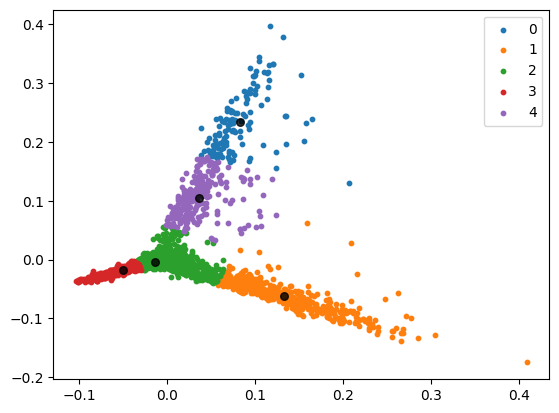

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        3
360483  love gum tasty gluten nasty sugar alcohols rea...        2
469023  pickyeater cats kids ate whatever offered two ...        3
319728  cookies soooo delicious due celiac disease glu...        3
30185   one best gf bread mixes available use bake sor...        2
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        2
102562  currently compete triathlons battling cramps b...        2
349848  item received match picture item name received...        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


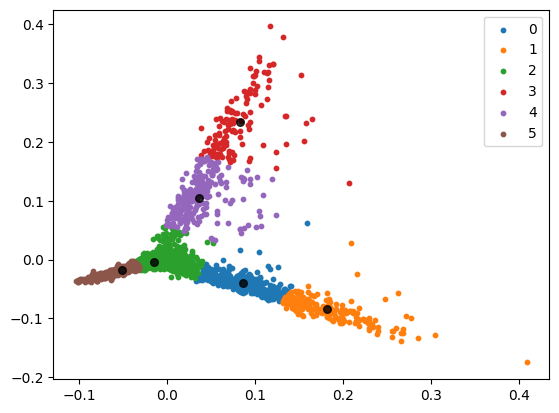

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        0
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        2
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        5
30185   one best gf bread mixes available use bake sor...        2
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        2
102562  currently compete triathlons battling cramps b...        2
349848  item received match picture item name received...        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


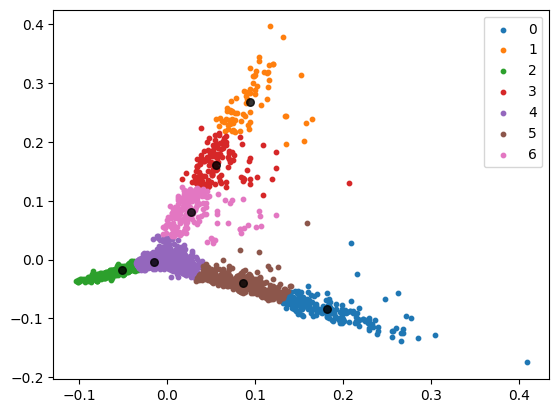

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        5
238270  dogs love healthy alternative treats one thing...        2
360483  love gum tasty gluten nasty sugar alcohols rea...        4
469023  pickyeater cats kids ate whatever offered two ...        2
319728  cookies soooo delicious due celiac disease glu...        2
30185   one best gf bread mixes available use bake sor...        4
221831  highly recommend get naked brand products dent...        4
421038  tastes like rancid dishrag pickled brine sign ...        4
102562  currently compete triathlons battling cramps b...        4
349848  item received match picture item name received...        4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


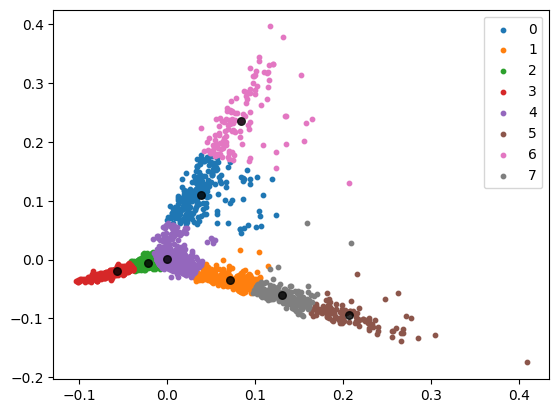

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        3
360483  love gum tasty gluten nasty sugar alcohols rea...        2
469023  pickyeater cats kids ate whatever offered two ...        3
319728  cookies soooo delicious due celiac disease glu...        2
30185   one best gf bread mixes available use bake sor...        2
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        4
102562  currently compete triathlons battling cramps b...        4
349848  item received match picture item name received...        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


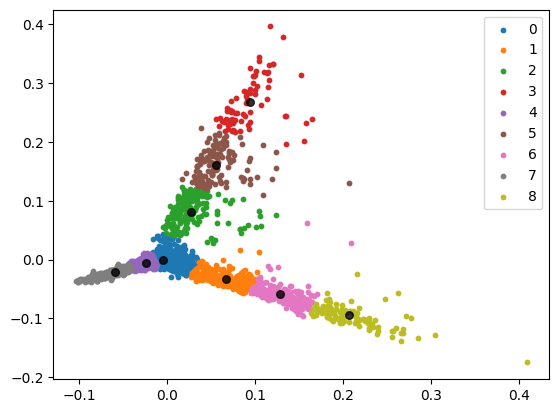

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        7
360483  love gum tasty gluten nasty sugar alcohols rea...        4
469023  pickyeater cats kids ate whatever offered two ...        7
319728  cookies soooo delicious due celiac disease glu...        4
30185   one best gf bread mixes available use bake sor...        4
221831  highly recommend get naked brand products dent...        4
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


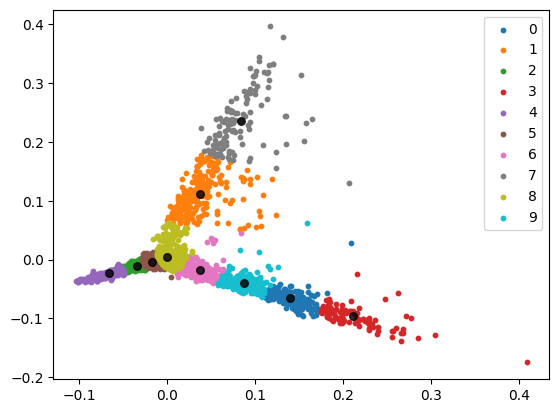

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        9
238270  dogs love healthy alternative treats one thing...        4
360483  love gum tasty gluten nasty sugar alcohols rea...        5
469023  pickyeater cats kids ate whatever offered two ...        4
319728  cookies soooo delicious due celiac disease glu...        2
30185   one best gf bread mixes available use bake sor...        5
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        8
102562  currently compete triathlons battling cramps b...        5
349848  item received match picture item name received...        5


In [18]:
# A list holds the SSE values for each k
sse = []
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for k in range(2, 11):
  # Uncomment the line below to run kmeans++
  #kmeans = KMeans(n_clusters=k)
  kmeans = KMeans(n_clusters=k, init='random')
  kmeans.fit(data2D)
  y_kmeans = kmeans.predict(data2D)
  df_plot = pd.DataFrame({'X': data2D[:, 0], 'Y': data2D[:, 1], 'Cluster': y_kmeans})
  for i in range(0, k):
    clusterPlotData = df_plot[df_plot['Cluster'] == i]
    plt.scatter(clusterPlotData['X'], clusterPlotData['Y'], c=color[i], s=10, label=i)
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.8)
  plt.legend()
  # Uncomment below line to save charts and comment plt.show
  #plt.savefig('/content/drive/MyDrive/data-clustering-plots/kmeans'+ str(k) +'.jpg')
  plt.show()
  sse.append(kmeans.inertia_)
  df1 = pd.DataFrame({'Text': df['Text'], 'Cluster': y_kmeans})
  print(df1[:10])

In [19]:
print(sse)

[16.27749691226183, 6.090974731032253, 4.782723881323039, 3.705984835132813, 2.489006181122323, 2.0978249969662626, 1.835643554053413, 1.4755836524332113, 1.5651367284412205]


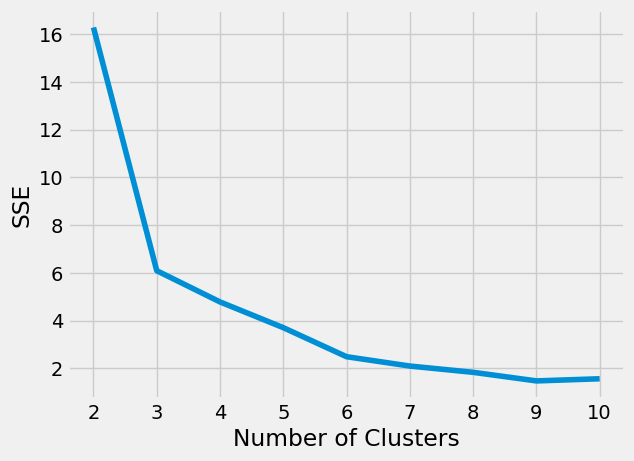

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
   # Uncomment the line below to run kmeans++
   #kmeans = KMeans(n_clusters=k)
   kmeans = KMeans(n_clusters=k, init='random')
   kmeans.fit(data2D)
   score = silhouette_score(data2D, kmeans.labels_)
   silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
print(silhouette_coefficients)

[0.7149459014347481, 0.7828665588917019, 0.7277556995828209, 0.5310367591174248, 0.5629574522945204, 0.49740461582393647, 0.475314833811205, 0.45093777154528336, 0.4531237485766858]


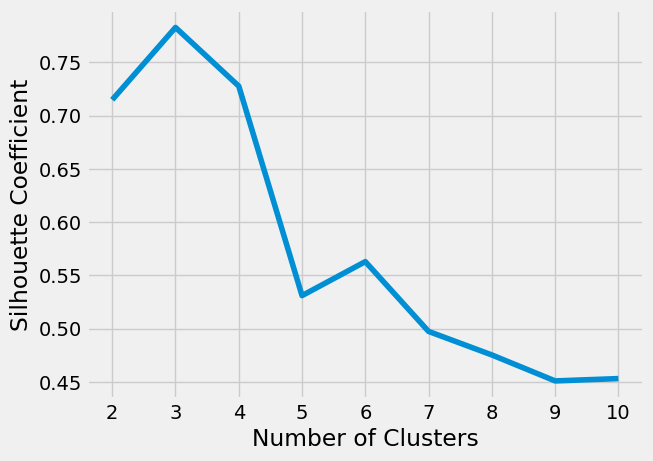

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

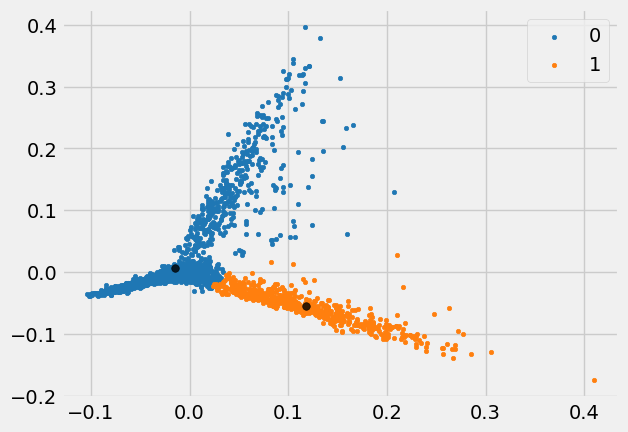

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        0
360483  love gum tasty gluten nasty sugar alcohols rea...        0
469023  pickyeater cats kids ate whatever offered two ...        0
319728  cookies soooo delicious due celiac disease glu...        0
30185   one best gf bread mixes available use bake sor...        0
221831  highly recommend get naked brand products dent...        0
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        0


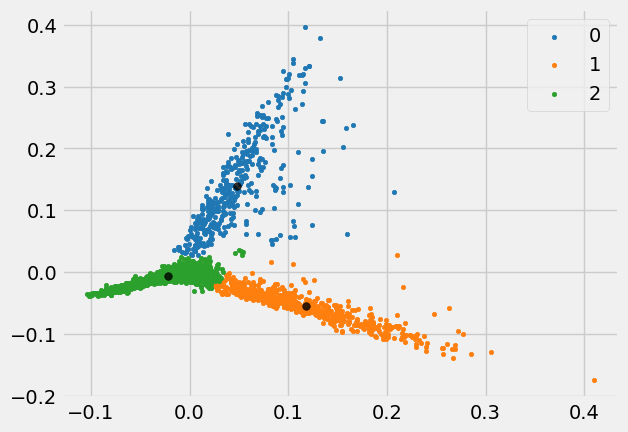

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        2
360483  love gum tasty gluten nasty sugar alcohols rea...        2
469023  pickyeater cats kids ate whatever offered two ...        2
319728  cookies soooo delicious due celiac disease glu...        2
30185   one best gf bread mixes available use bake sor...        2
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        2
102562  currently compete triathlons battling cramps b...        2
349848  item received match picture item name received...        2


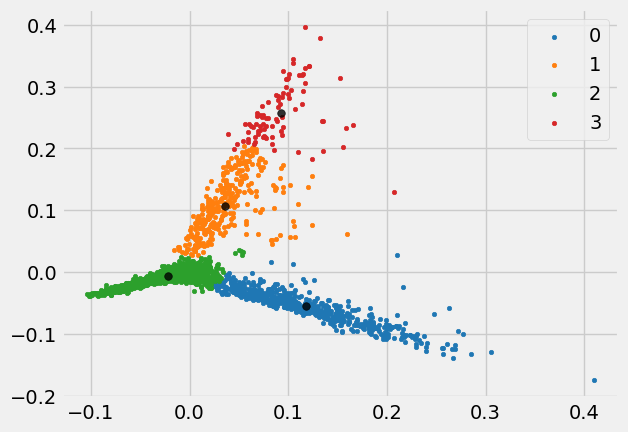

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        0
238270  dogs love healthy alternative treats one thing...        2
360483  love gum tasty gluten nasty sugar alcohols rea...        2
469023  pickyeater cats kids ate whatever offered two ...        2
319728  cookies soooo delicious due celiac disease glu...        2
30185   one best gf bread mixes available use bake sor...        2
221831  highly recommend get naked brand products dent...        2
421038  tastes like rancid dishrag pickled brine sign ...        2
102562  currently compete triathlons battling cramps b...        2
349848  item received match picture item name received...        2


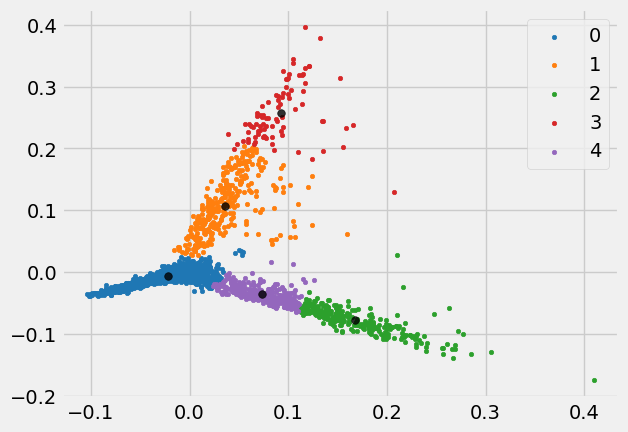

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        4
238270  dogs love healthy alternative treats one thing...        0
360483  love gum tasty gluten nasty sugar alcohols rea...        0
469023  pickyeater cats kids ate whatever offered two ...        0
319728  cookies soooo delicious due celiac disease glu...        0
30185   one best gf bread mixes available use bake sor...        0
221831  highly recommend get naked brand products dent...        0
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        0


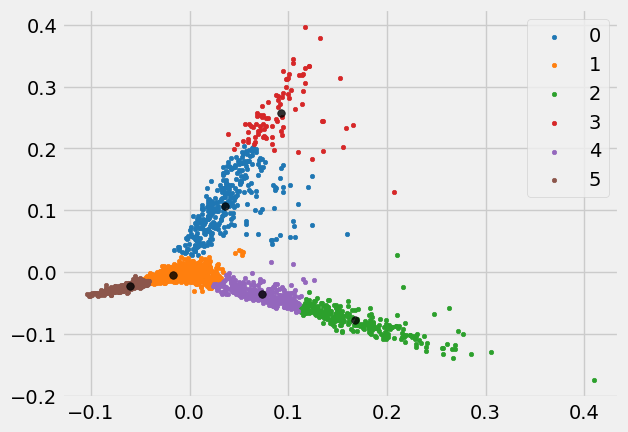

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        4
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        1
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        1
30185   one best gf bread mixes available use bake sor...        1
221831  highly recommend get naked brand products dent...        1
421038  tastes like rancid dishrag pickled brine sign ...        1
102562  currently compete triathlons battling cramps b...        1
349848  item received match picture item name received...        1


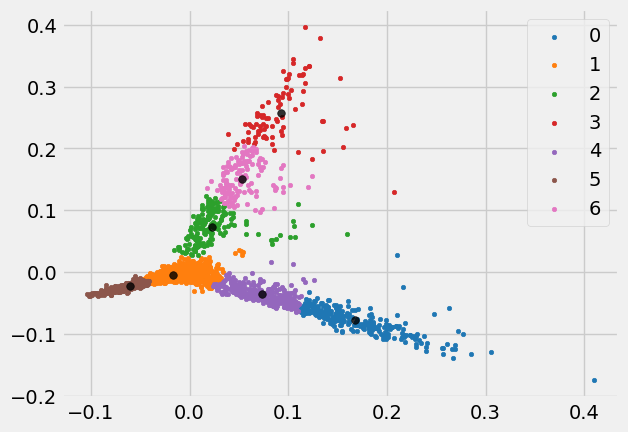

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        4
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        1
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        1
30185   one best gf bread mixes available use bake sor...        1
221831  highly recommend get naked brand products dent...        1
421038  tastes like rancid dishrag pickled brine sign ...        1
102562  currently compete triathlons battling cramps b...        1
349848  item received match picture item name received...        1


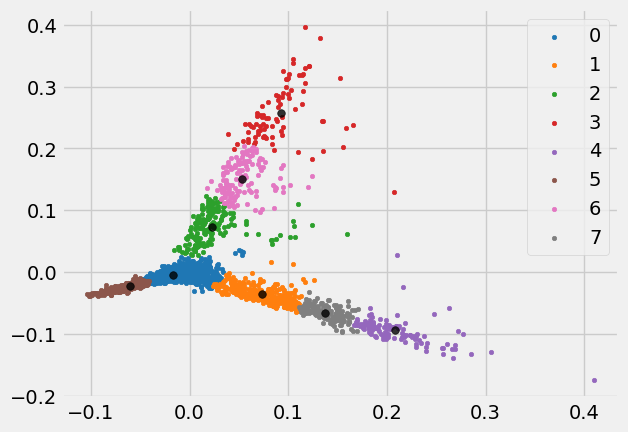

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        0
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        0
30185   one best gf bread mixes available use bake sor...        0
221831  highly recommend get naked brand products dent...        0
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        0


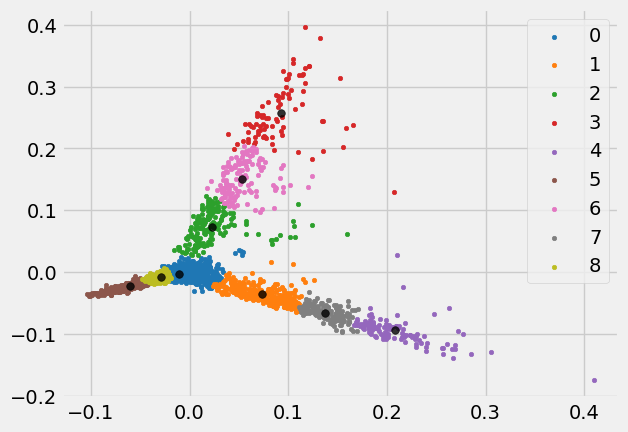

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        1
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        0
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        8
30185   one best gf bread mixes available use bake sor...        0
221831  highly recommend get naked brand products dent...        8
421038  tastes like rancid dishrag pickled brine sign ...        0
102562  currently compete triathlons battling cramps b...        0
349848  item received match picture item name received...        8


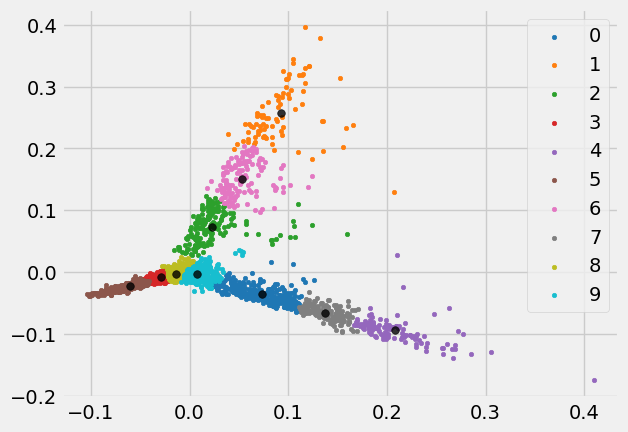

                                                     Text  Cluster
136507  friend recieved box free sample brooklyn bean ...        0
238270  dogs love healthy alternative treats one thing...        5
360483  love gum tasty gluten nasty sugar alcohols rea...        8
469023  pickyeater cats kids ate whatever offered two ...        5
319728  cookies soooo delicious due celiac disease glu...        3
30185   one best gf bread mixes available use bake sor...        8
221831  highly recommend get naked brand products dent...        3
421038  tastes like rancid dishrag pickled brine sign ...        9
102562  currently compete triathlons battling cramps b...        8
349848  item received match picture item name received...        3


In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

silhouette_coefficients_agg = []
sse_agg = []
for k in range(2, 11):
  clustering = AgglomerativeClustering(n_clusters=k).fit(data2D)
  y_predict = clustering.labels_
  clf = NearestCentroid()
  clf.fit(data2D, y_predict)
  df_plot = pd.DataFrame({'X': data2D[:, 0], 'Y': data2D[:, 1], 'Cluster': y_predict})
  for i in range(0, k):
    clusterPlotData = df_plot[df_plot['Cluster'] == i]
    plt.scatter(clusterPlotData['X'], clusterPlotData['Y'], c=color[i], s=10, label=i)
  plt.legend()
  centers = clf.centroids_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.8)
  # Uncomment below line to save charts and comment plt.show
  #plt.savefig('/content/drive/MyDrive/data-clustering-plots/agg'+ str(k) +'.jpg')
  plt.show()
  score = silhouette_score(data2D, y_predict)
  silhouette_coefficients_agg.append(score)
  sumSquare = 0
  for j in range(len(data2D)):
    center = centers[y_predict[j]]
    distance = (center[0] - data2D[j, 0])**2 + (center[1] - data2D[j, 1])**2
    sumSquare += distance
  sse_agg.append(sumSquare)
  df1 = pd.DataFrame({'Text': df['Text'], 'Cluster': y_predict})
  print(df1[:10])

In [25]:
print(sse_agg)

[16.652362545563605, 6.95132444671975, 5.214176953965005, 3.6879955806961062, 2.825471158710691, 2.2792622815619357, 1.8946710952500458, 1.5994249226224473, 1.4512095592783145]


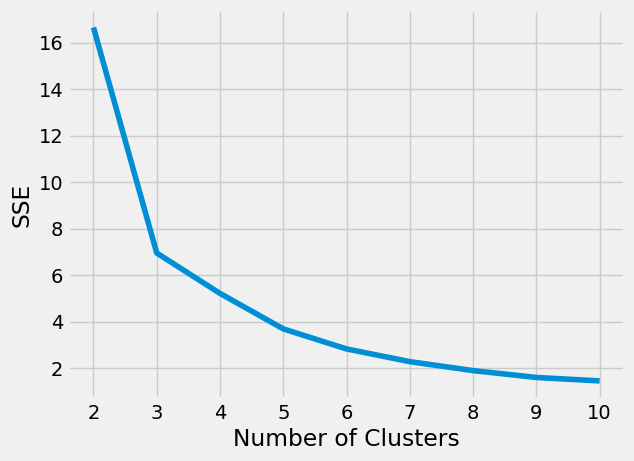

In [26]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse_agg)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

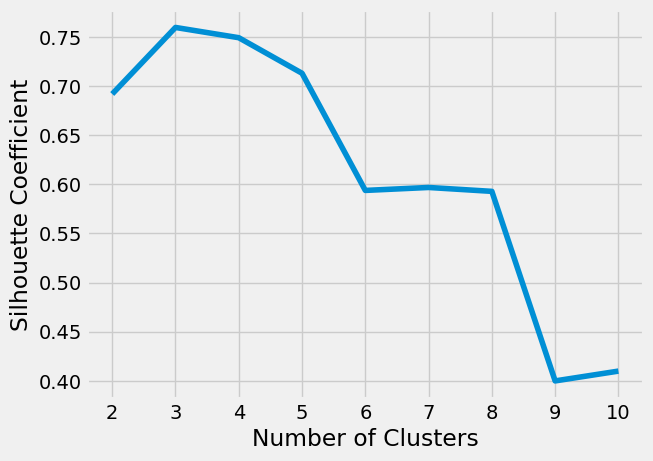

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients_agg)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [28]:
print(silhouette_coefficients_agg)

[0.6918399420476093, 0.7595577282682838, 0.7491244089731679, 0.7129361809249849, 0.593718480754173, 0.5967226574434822, 0.5927606405026988, 0.39987115002227397, 0.4098520154988161]


In [ ]:
# References
# https://realpython.com/k-means-clustering-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/auto_examples/index.html#clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# https://stackoverflow.com/questions/40994347/sklearn-clustering-calculate-silhouette-coefficient-on-tf-idf-weigthed-data
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
# https://stackoverflow.com/questions/69240811/plots-in-a-loop-are-overwritten
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# https://pythonspot.com/matplotlib-save-figure-to-image-file/
# https://stackoverflow.com/questions/56456572/how-to-get-agglomerative-clustering-centroid-in-python-scikit-learn
# https://scikit-learn.org/stable/modules/neighbors.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html